In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets as sd
import sklearn.model_selection as ms
import scipy.linalg as sl
import numpy as np
mnist = sd.fetch_mldata("MNIST original")

In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
data, target = mnist.data, mnist.target

In [4]:
data.shape
data[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73, 253, 227,
        73,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  73,
       251, 251, 251, 174,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

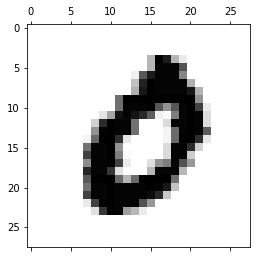

In [5]:
plt.matshow(data[3].reshape(28, 28), cmap=plt.cm.gray_r)

In [6]:
data_train, data_test, target_train, target_test = ms.train_test_split(data, target, train_size=60000, 
                                                                       test_size=10000, stratify=target)

In [7]:
data_train.shape

(60000, 784)

In [8]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

In [9]:
clf.fit(data_train, target_train)

/anaconda3/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [10]:
clf.score(data_test, target_test)

0.865

# Data augmentation

In [12]:
import PIL

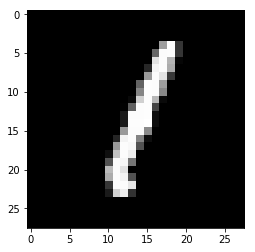

In [69]:
sample = data_train[34222].reshape(28, 28)
img = PIL.Image.fromarray(sample)
plt.imshow(img)

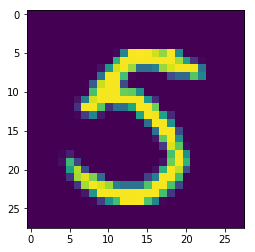

In [55]:
plt.imshow(sample)

# Deskewing images

In [73]:
def raw_moment(data, i_order, j_order):
  nrows, ncols = data.shape
  y_indices, x_indicies = np.mgrid[:nrows, :ncols]
  return (data * x_indicies**i_order * y_indices**j_order).sum()

def moments_cov(data):
  data_sum = data.sum()
  m10 = raw_moment(data, 1, 0)
  m01 = raw_moment(data, 0, 1)
  x_centroid = m10 / data_sum
  y_centroid = m01 / data_sum
  u11 = (raw_moment(data, 1, 1) - x_centroid * m01) / data_sum
  u20 = (raw_moment(data, 2, 0) - x_centroid * m10) / data_sum
  u02 = (raw_moment(data, 0, 2) - y_centroid * m01) / data_sum
  cov = np.array([[u20, u11], [u11, u02]])
  return cov

def determine_image_skew(data):
    cov = moments_cov(data)
    evals, evecs = sl.eigh(cov)
    
    x_v1, y_v1 = evecs[:, 1]  # Eigenvector with largest eigenvalue
    x_v2, y_v2 = evecs[:, 0]
    theta = np.tanh((x_v1)/(y_v1))
    
    return theta

def deskew_image(img):
    angle = determine_image_skew(img)
    pimg = PIL.Image.fromarray(img[::-1])
    pimg = pimg.rotate(-100 * angle)
    img = np.array(pimg)[::-1]
    return img



In [56]:
angle = determine_image_skew(sample)
angle

-0.13251031410806127

In [47]:
angle

0.7833999662104804

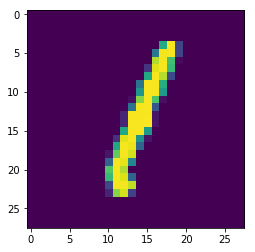

In [74]:
plt.imshow(sample)


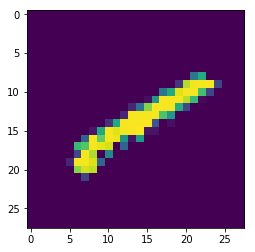

In [75]:
plt.imshow(deskew_image(sample))